In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16

In [2]:
b_size = 5
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, 
                                   width_shift_range=0.1, height_shift_range=0.1, fill_mode='nearest')
train_generator = train_datagen.flow_from_directory('train', target_size=(150,150), batch_size=b_size, class_mode='binary')

Found 160 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory('test', target_size=(150,150), batch_size=b_size, class_mode='binary')

Found 120 images belonging to 2 classes.


In [4]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable=False
transfer_model.summary()

58892288/58889256 [==============================] - 10s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____________________________________________________________

In [5]:
finetune_model = Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 15,239,170
Trainable params: 524,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
finetune_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])       

steps_train = len(train_generator)
steps_test = len(test_generator)

hist = finetune_model.fit(train_generator, steps_per_epoch=steps_train, epochs=20, 
                 validation_data=test_generator, validation_steps=steps_test)

Epoch 1/20
32/32 [==============================] - 9s 280ms/step - loss: 0.6421 - accuracy: 0.6000 - val_loss: 0.4137 - val_accuracy: 0.8833
Epoch 2/20
32/32 [==============================] - 9s 272ms/step - loss: 0.3171 - accuracy: 0.8875 - val_loss: 0.3145 - val_accuracy: 0.9000
Epoch 3/20
32/32 [==============================] - 9s 272ms/step - loss: 0.2609 - accuracy: 0.9125 - val_loss: 0.2350 - val_accuracy: 0.9333
Epoch 4/20
32/32 [==============================] - 9s 275ms/step - loss: 0.1962 - accuracy: 0.9375 - val_loss: 0.3152 - val_accuracy: 0.8417
Epoch 5/20
32/32 [==============================] - 9s 279ms/step - loss: 0.2851 - accuracy: 0.8500 - val_loss: 0.2088 - val_accuracy: 0.9167
Epoch 6/20
32/32 [==============================] - 9s 283ms/step - loss: 0.1770 - accuracy: 0.9375 - val_loss: 0.2725 - val_accuracy: 0.8833
Epoch 7/20
32/32 [==============================] - 9s 284ms/step - loss: 0.1656 - accuracy: 0.9438 - val_loss: 0.1415 - val_accuracy: 0.9583
Epoch 

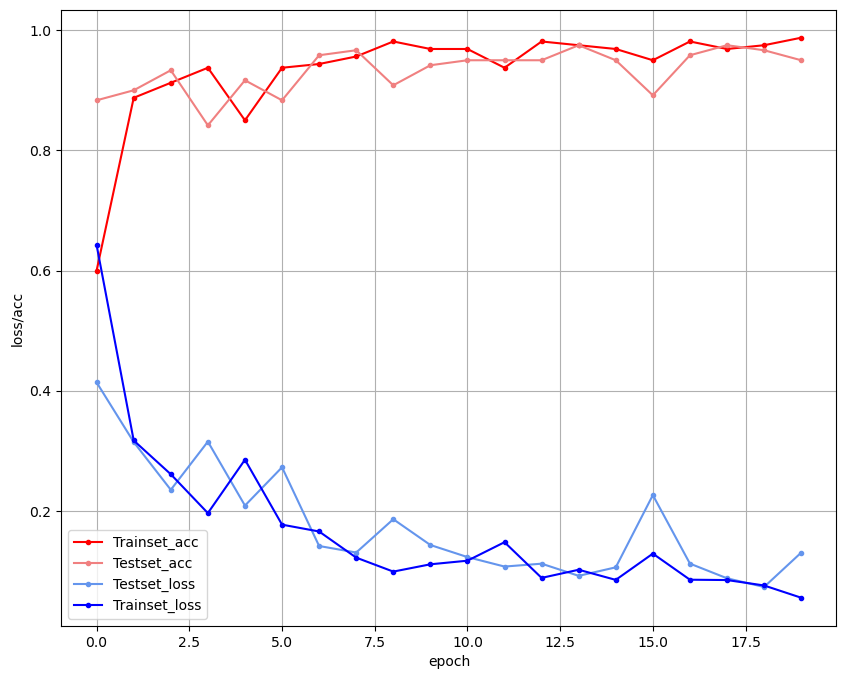

In [7]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.figure(figsize=(10,8))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

In [1]:
from tensorflow.python.client import device_lib

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5945667195086509756,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8796998012822872938
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4951408640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4040625472398659761
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16220786384130459571
 physical_device_desc: "device: XLA_GPU device"]

In [6]:
import tensorflow as tf

In [7]:
tf.__version__

'2.7.0'